Problem-1)


classify the Size_Categorie using SVM for Forestfires data.

Data Description:

month month of the year: 'jan' to 'dec'

day day of the week: 'mon' to 'sun'

FFMC: FFMC index from the FWI system: 18.7 to 96.20

DMC: DMC index from the FWI system: 1.1 to 291.3

DC: DC index from the FWI system: 7.9 to 860.6

ISI: ISI index from the FWI system: 0.0 to 56.10

temp: temperature in Celsius degrees: 2.2 to 33.30

RH: relative humidity in %: 15.0 to 100

wind: wind speed in km/h: 0.40 to 9.40

rain: outside rain in mm/m2 : 0.0 to 6.4

Size_Categorie: the burned area of the forest ( Small , Large)

In [ ]:
#importing libraries
#svm classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# svm import
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
forestfires=pd.read_csv('forestfires.csv')
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


EDA

In [ ]:
forestfires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
forestfires.shape

(517, 31)

In [ ]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:

forestfires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:

forestfires.duplicated().value_counts()

False    509
True       8
dtype: int64

There are 8 duplicate records in the given dataset.

In [ ]:

forestfires[forestfires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:

#Droping duplicated records from dataset
ffires_nodup=forestfires.copy()
ffires_nodup=forestfires.drop_duplicates().reset_index()
ffires_nodup=ffires_nodup.drop('index',axis=1)
ffires_nodup

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
ffires_nodup.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


In [ ]:
# number of distinct values in each feature
for i, column in enumerate(ffires_nodup.columns, 1):
  print('Distinct values in feature ',ffires_nodup[column].name,' are ',ffires_nodup[column].nunique())

Distinct values in feature  month  are  12
Distinct values in feature  day  are  7
Distinct values in feature  FFMC  are  106
Distinct values in feature  DMC  are  215
Distinct values in feature  DC  are  219
Distinct values in feature  ISI  are  119
Distinct values in feature  temp  are  192
Distinct values in feature  RH  are  75
Distinct values in feature  wind  are  21
Distinct values in feature  rain  are  7
Distinct values in feature  area  are  251
Distinct values in feature  dayfri  are  2
Distinct values in feature  daymon  are  2
Distinct values in feature  daysat  are  2
Distinct values in feature  daysun  are  2
Distinct values in feature  daythu  are  2
Distinct values in feature  daytue  are  2
Distinct values in feature  daywed  are  2
Distinct values in feature  monthapr  are  2
Distinct values in feature  monthaug  are  2
Distinct values in feature  monthdec  are  2
Distinct values in feature  monthfeb  are  2
Distinct values in feature  monthjan  are  2
Distinct value

VISUALISATION

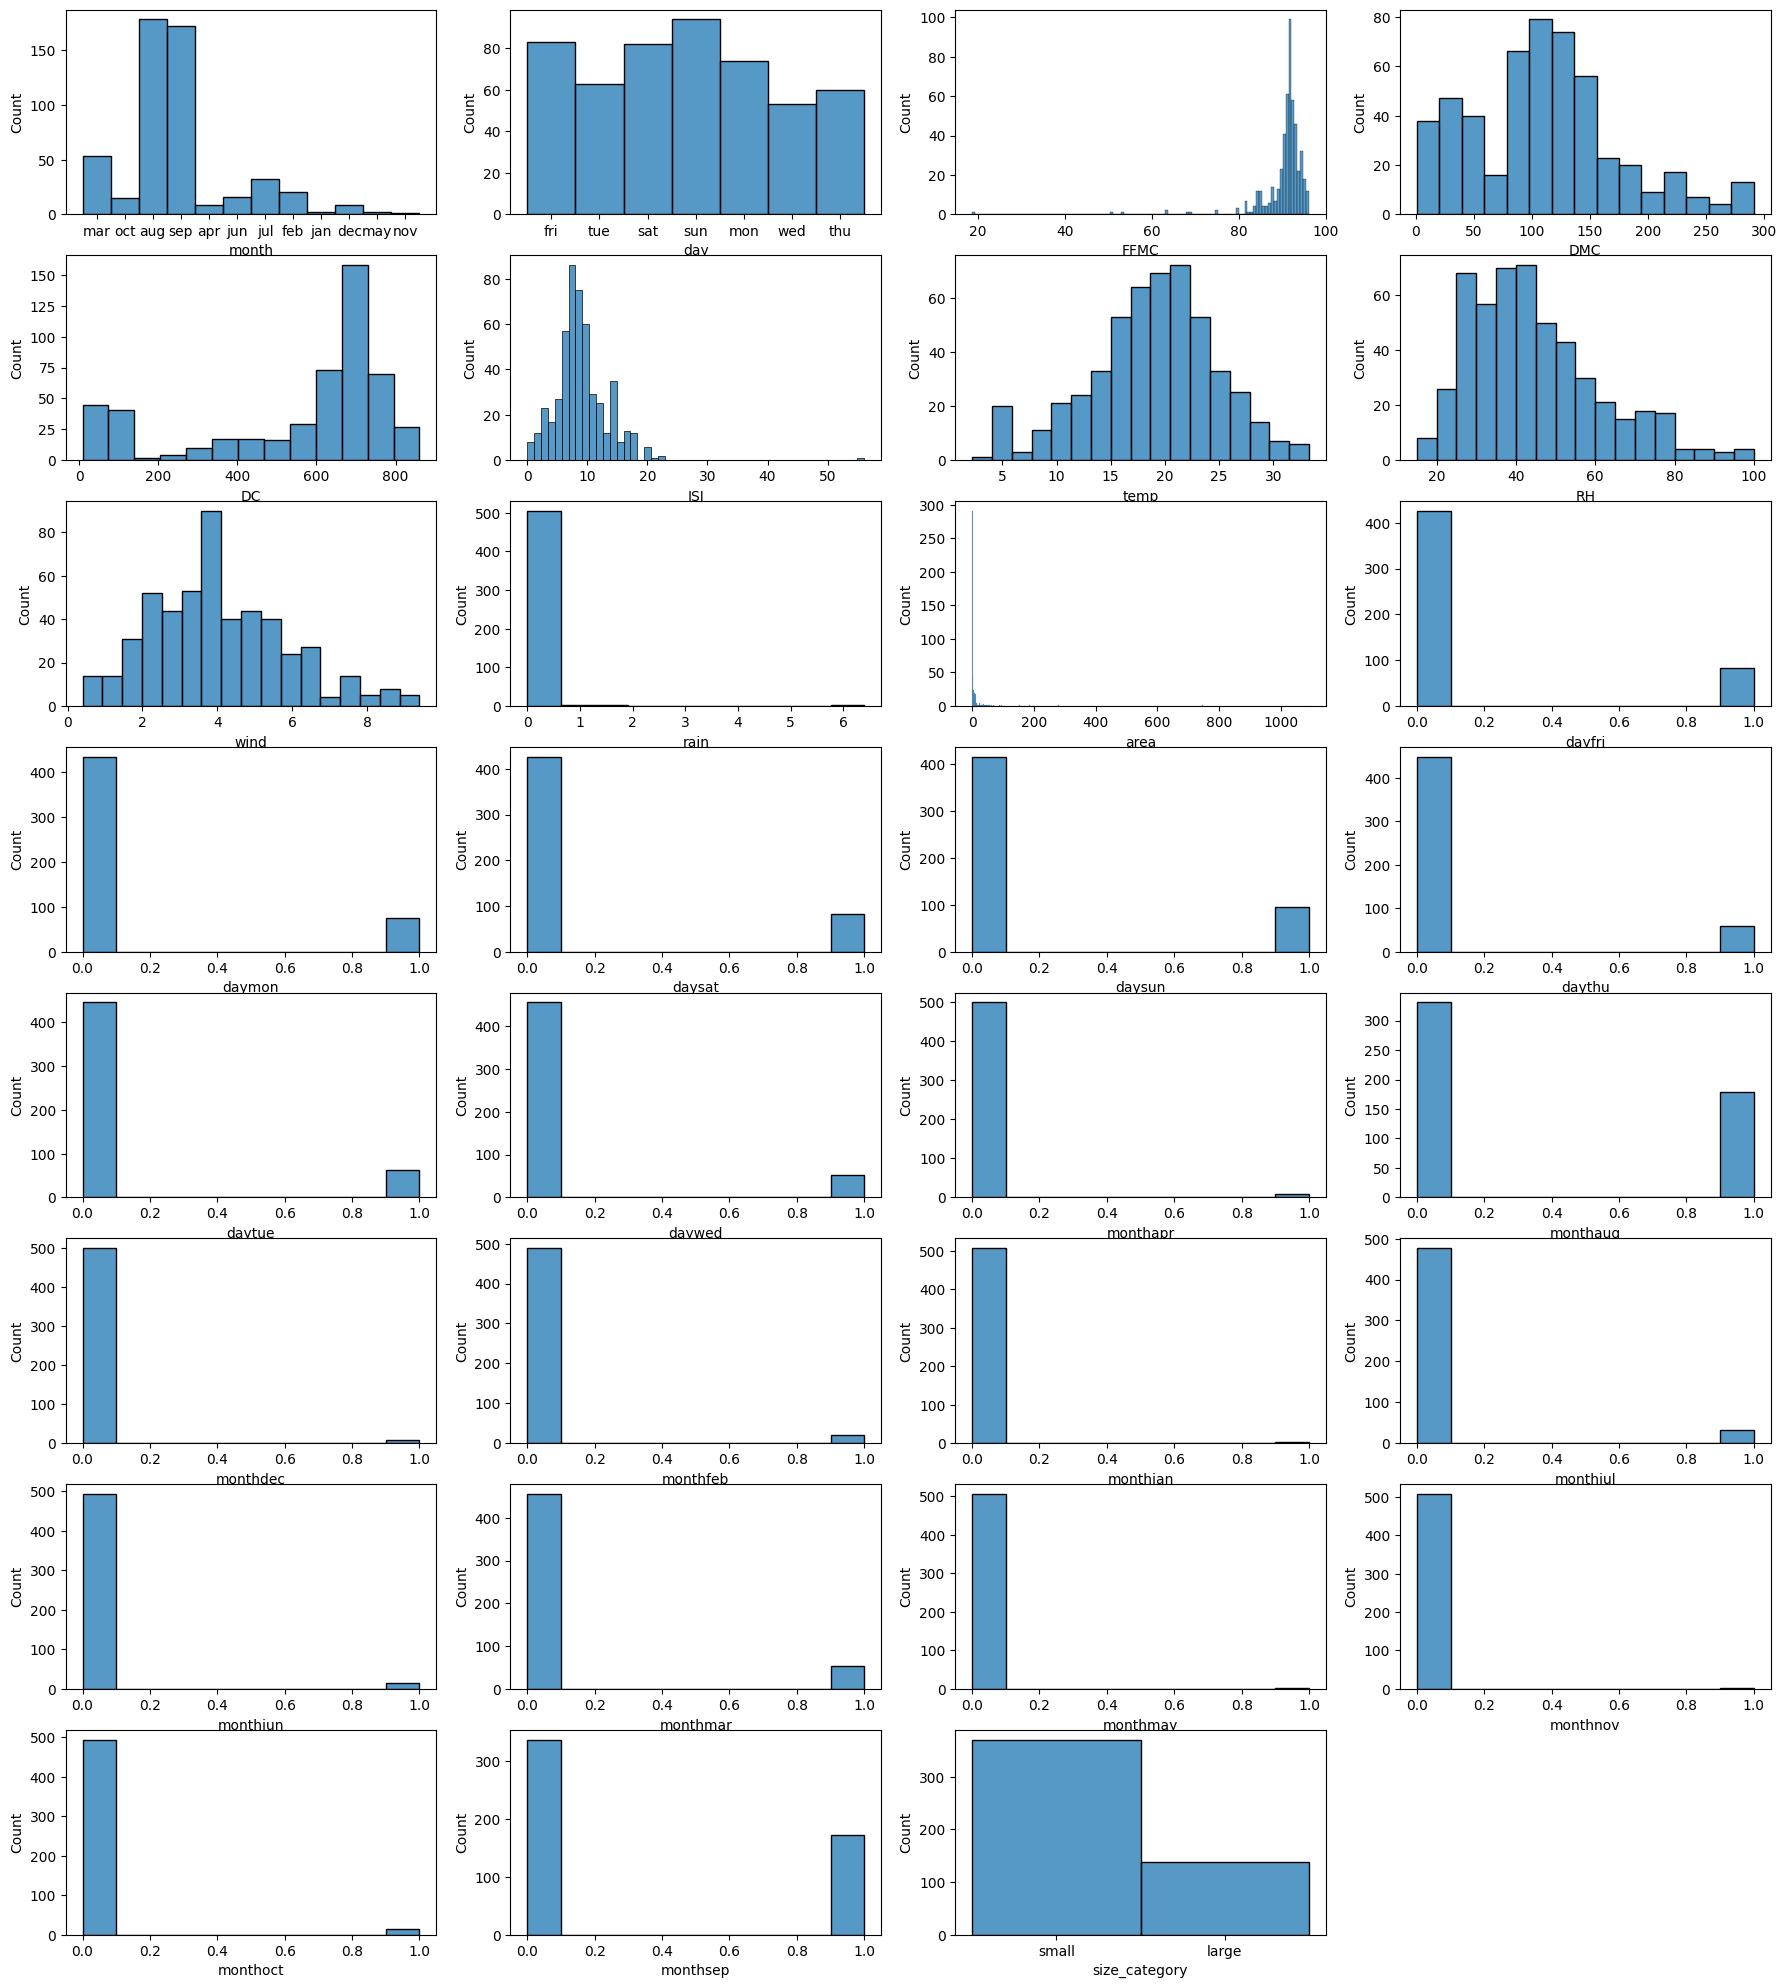

In [ ]:

#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(ffires_nodup.columns, 1):
    plt.subplot(8,4,i)
    sns.histplot(ffires_nodup[column])

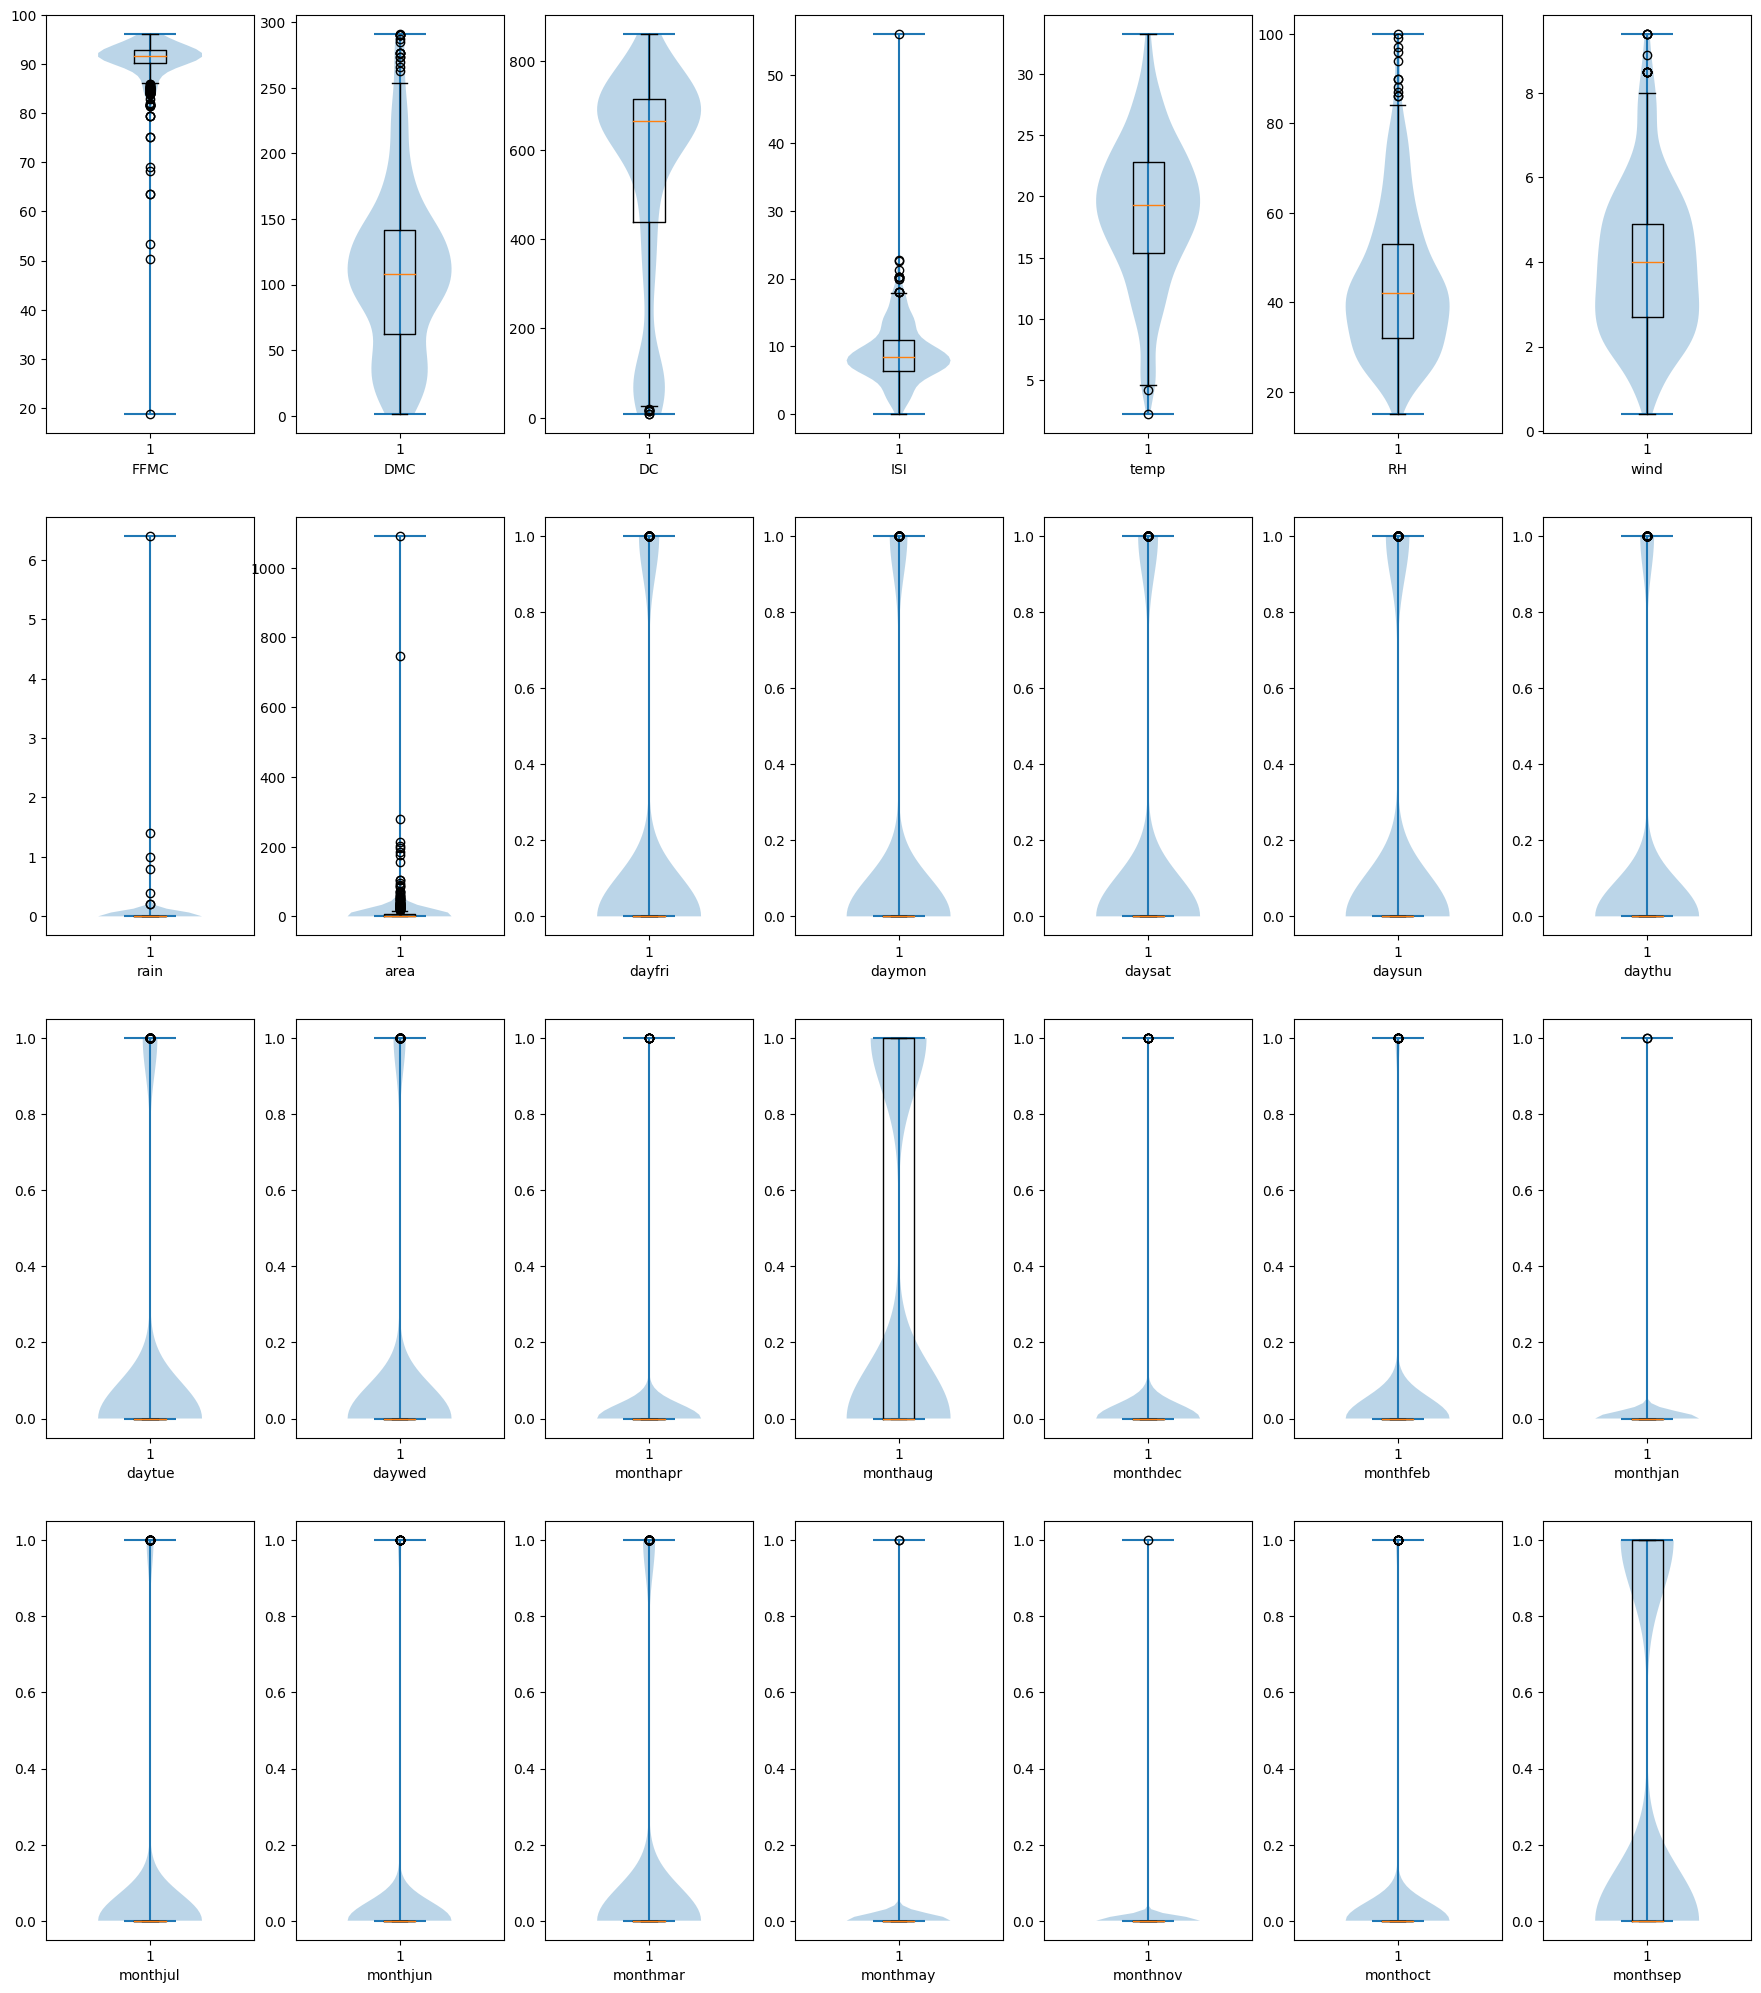

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,25))
for i, column in enumerate(ffires_nodup[[feature for feature in ffires_nodup.columns if ffires_nodup[feature].dtypes != 'O']].columns, 1):
    plt.subplot(4,7,i)
    plt.violinplot(ffires_nodup[column])
    plt.boxplot(ffires_nodup[column])
    plt.xlabel(ffires_nodup[column].name)

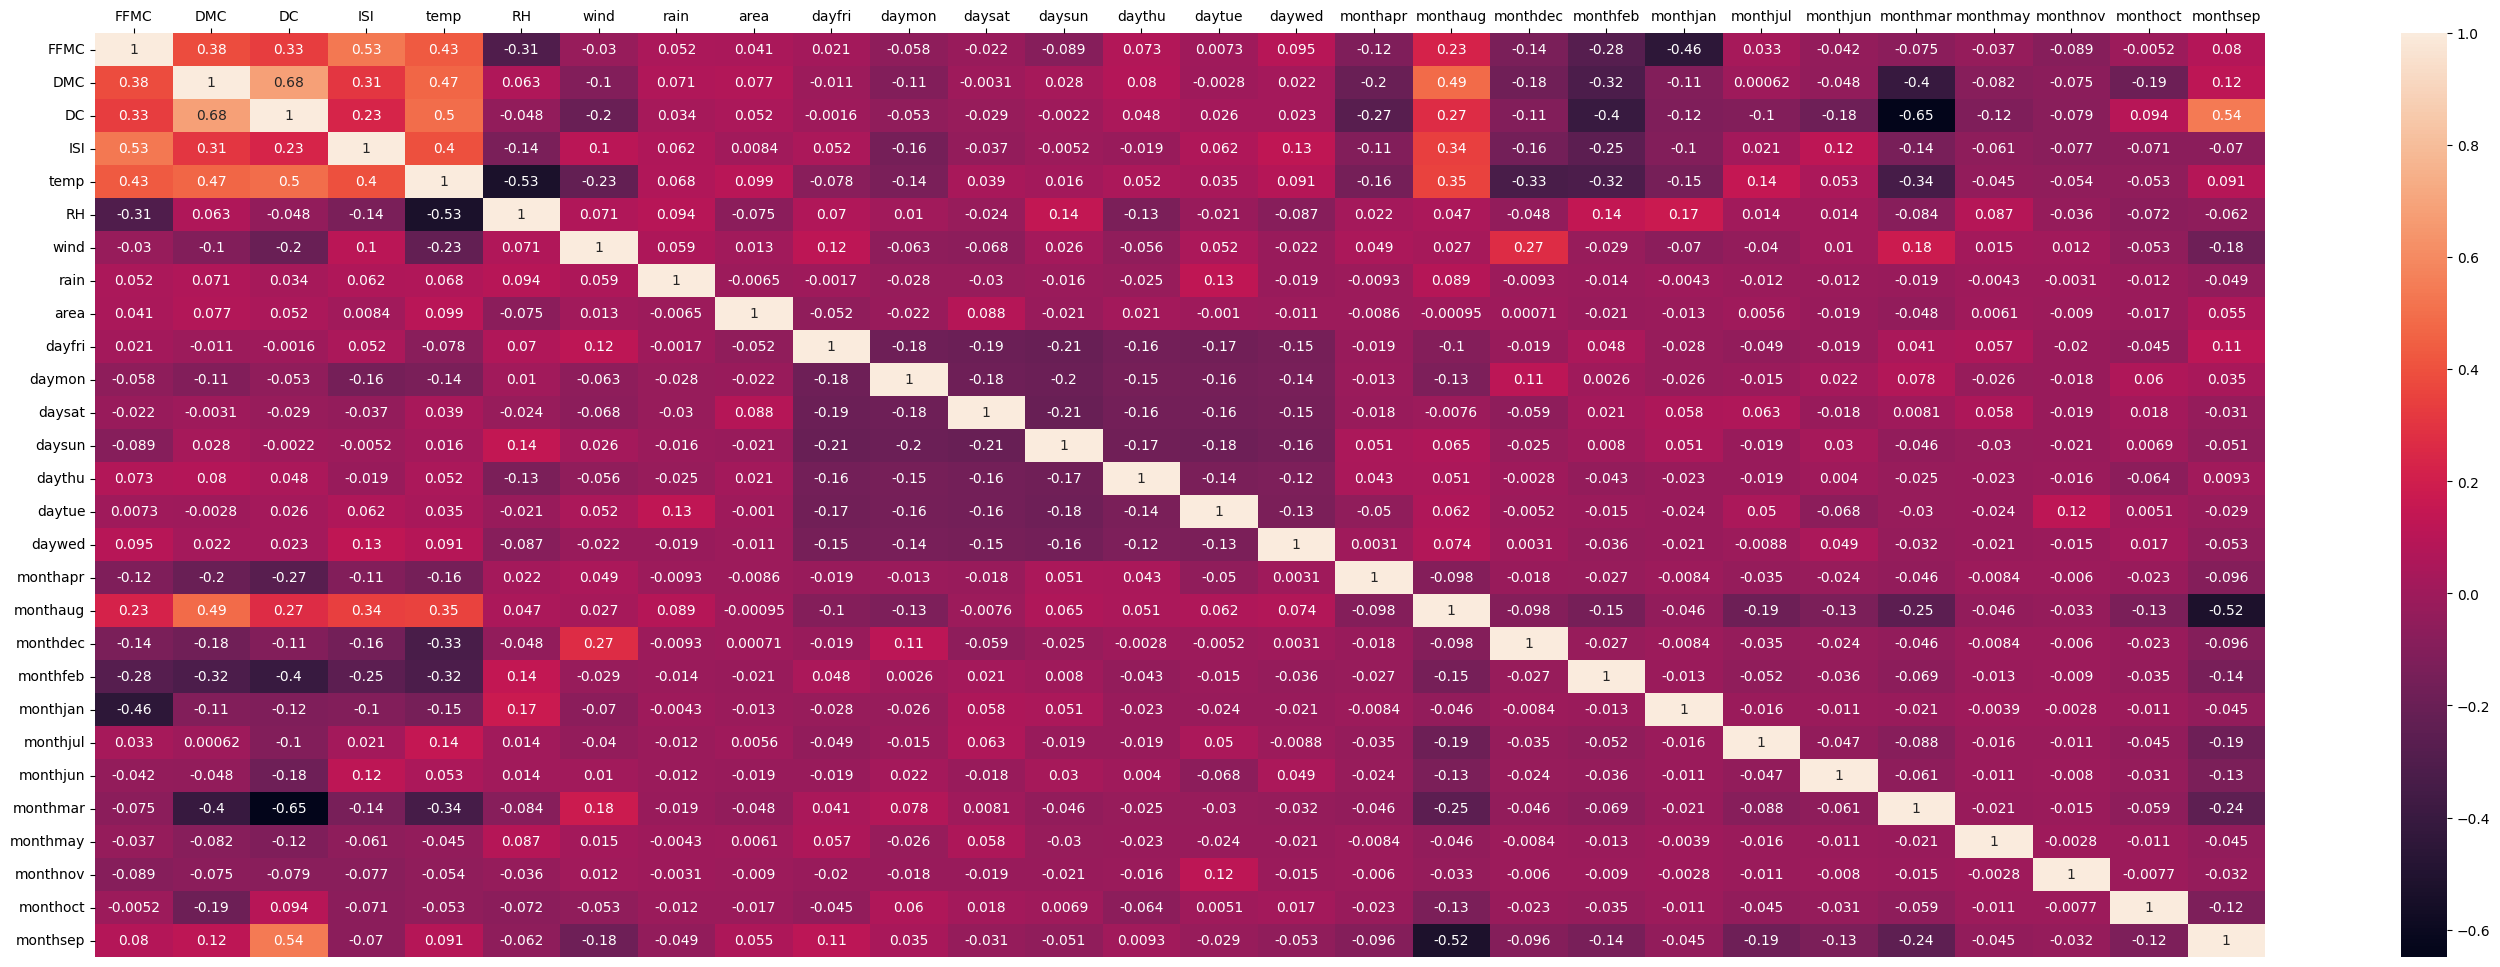

In [ ]:
#plotting the heatmap for correlation
plt.figure(figsize=(35,12))
ax = sns.heatmap(ffires_nodup.corr(), annot=True)
ax.xaxis.tick_top()

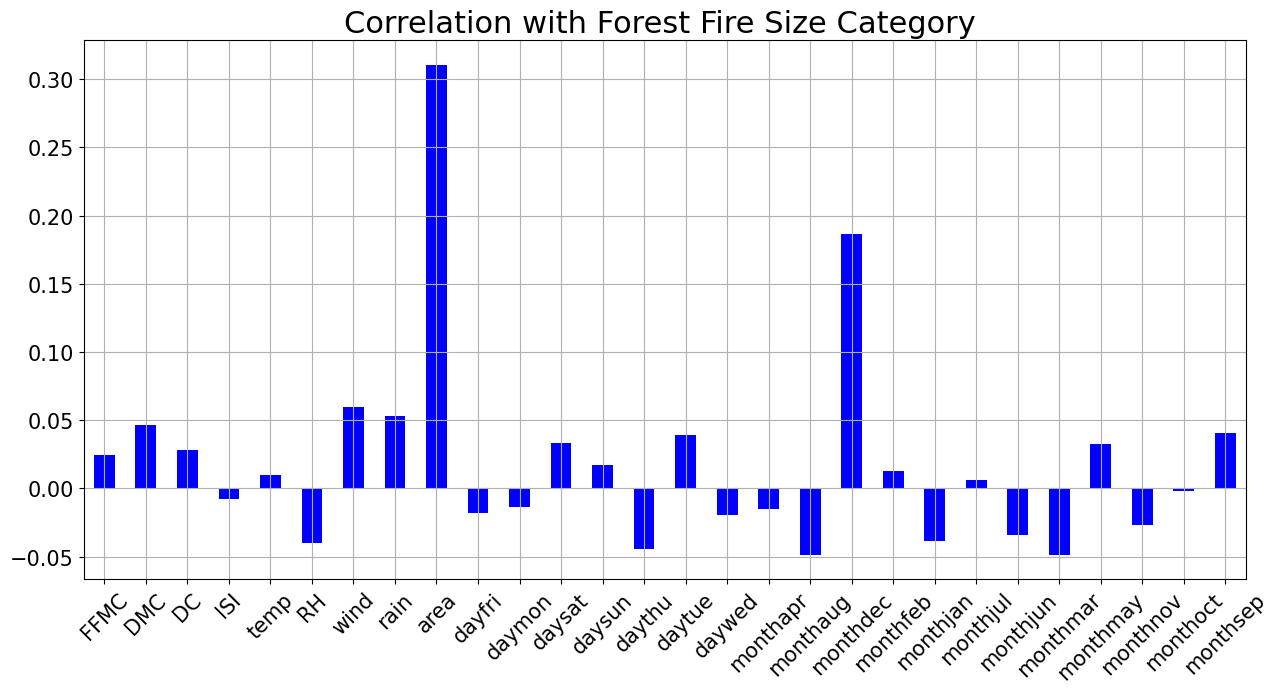

In [ ]:
#Correlation with Forest Fire Size Category
df = ffires_nodup.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = ffires_nodup.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize= (15,7), fontsize = 15, color = 'blue', rot = 45, grid = True)
plt.title('Correlation with Forest Fire Size Category ', horizontalalignment="center", fontsize = "22");

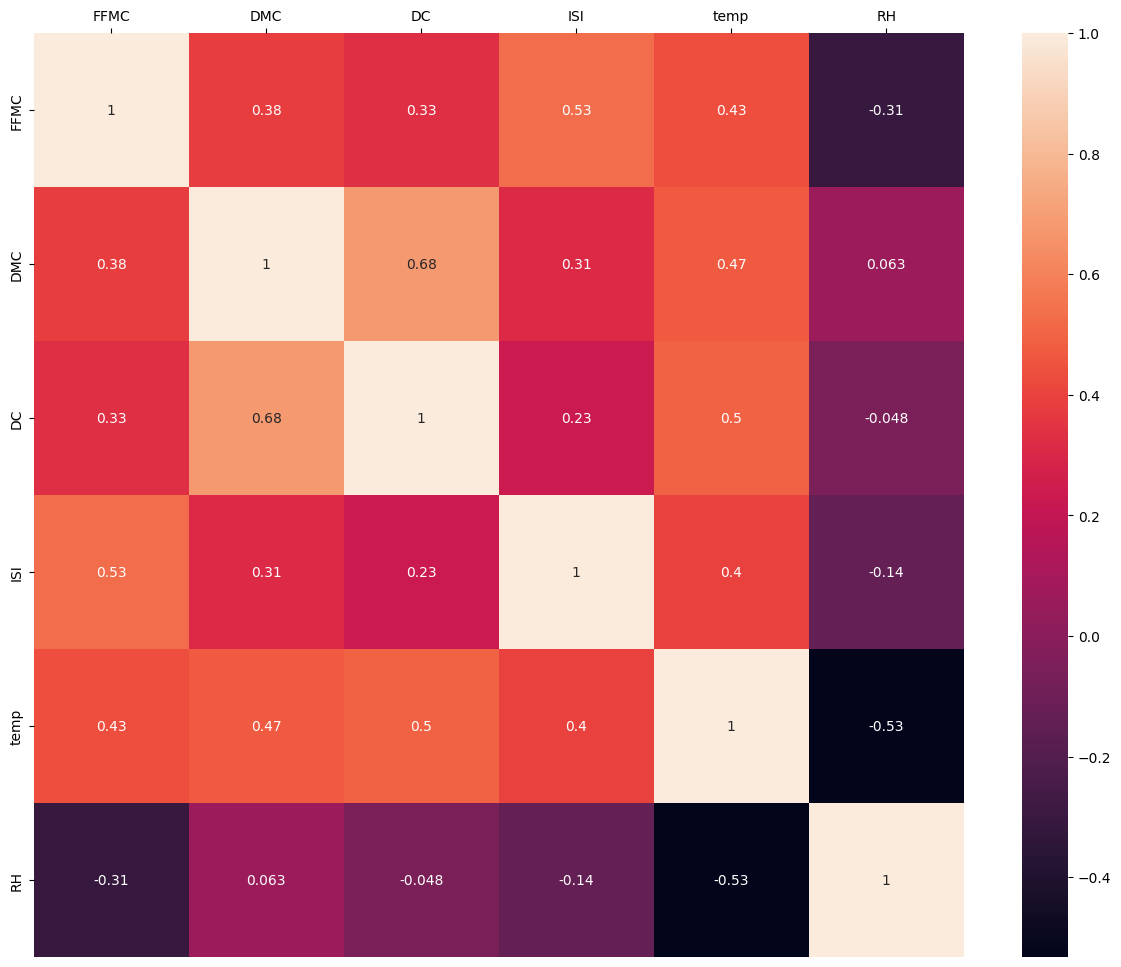

In [ ]:
#plotting the heatmap for correlation(standard features)
plt.figure(figsize=(15,12))
ax = sns.heatmap(ffires_nodup.iloc[:,:8].corr(), annot=True)
ax.xaxis.tick_top()

Label encoding

In [ ]:
from sklearn import preprocessing
ffires_lab=ffires_nodup.copy()
for i, column in enumerate(ffires_lab[[feature for feature in ffires_lab.columns if ffires_lab[feature].dtypes == 'O']].columns, 1):
  label_encoder=preprocessing.LabelEncoder()
  ffires_lab[column]=label_encoder.fit_transform(ffires_lab[column])
ffires_lab

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


Standardizing & Data Splitting

In [ ]:
std=StandardScaler()
ffires_std=ffires_lab.copy()

In [ ]:
x=ffires_std.drop('size_category',axis=1)
y=ffires_std['size_category']

In [ ]:
x_std=std.fit_transform(x)

In [ ]:
x=pd.DataFrame(x_std,columns=x.columns)
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.271858,-1.424495,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
1,0.958019,1.178046,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
2,0.958019,-0.383478,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413
3,0.271858,-1.424495,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
4,0.271858,0.137030,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
505,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
506,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413
507,-1.100464,-0.383478,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,...,-0.134164,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((341, 30), (168, 30), (341,), (168,))


Randamized search cv

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf', 'sigmoid', 'poly','linear'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
rsv = RandomizedSearchCV(clf,param_grid,cv=10)#,verbose=480
rsv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['rbf', 'sigmoid', 'poly',
                                                    'linear']}])

In [ ]:
rsv.best_params_ , rsv.best_score_

({'kernel': 'linear', 'gamma': 0.1, 'C': 10}, 0.9618487394957983)


Support Vector Machines classifier

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=10)
clf.fit(x_train , y_train)
y_train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred) * 100
print("Train data Accuracy =", train_acc)
y_test_pred = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred) * 100
print("Test data Accuracy =", test_acc)

Train data Accuracy = 98.53372434017595
Test data Accuracy = 95.23809523809523



 Test confusion matrix:



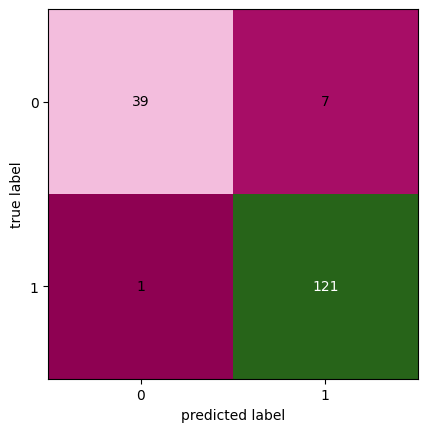

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n Test confusion matrix:\n')
cmt=confusion_matrix(y_test, y_test_pred)
fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
plt.show()

In [ ]:
verify=pd.DataFrame({'actual':y_test,'predict':y_test_pred,'equality':y_test==y_test_pred})
verify

,actual,predict,equality
79,1,1,True
317,0,1,False
486,1,1,True
397,1,1,True
167,1,1,True
...,...,...,...
3,1,1,True
361,0,0,True
421,1,1,True
60,1,1,True


In [ ]:
verify.equality.value_counts()

True     160
False      8
Name: equality, dtype: int64

Conclusion:

In [ ]:
print("\n SVM Train  Accuracy =",  np.round(accuracy_score(y_train, y_train_pred),2) * 100,'%')
print("\n SVM Test Accuracy =", np.round(accuracy_score(y_test, y_test_pred),2)* 100,'%')


 SVM Train  Accuracy = 99.0 %

 SVM Test Accuracy = 95.0 %


Problem-2)

Prepare a classification model using SVM for salary data

Data Description:

age -- age of a person

workclass -- A work class is a grouping of work

education -- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation -- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual

In [ ]:

salary_train=pd.read_csv('SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
salary_test=pd.read_csv('SalaryData_Test(1).csv')
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


EDA

In [ ]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
salary_train.duplicated().value_counts()

False    26903
True      3258
dtype: int64

There are 3258 duplicate records out of 30161 records in dataset.

In [ ]:
#duplicate records
salary_train[salary_train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
#droping duplicate records in train data
salary_train_nodup=salary_train.copy()
salary_train_nodup=salary_train.drop_duplicates()
salary_train_nodup

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
salary_train_nodup.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
salary_categorical_features=[feature for feature in salary_train_nodup.columns if salary_train_nodup[feature].dtypes == 'O']
salary_categorical=salary_train_nodup[salary_categorical_features]
salary_categorical.head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
for i, column in enumerate(salary_categorical.columns, 1):
    print(salary_categorical[column].value_counts())

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other

In [ ]:
salary_numerical_features=[feature for feature in salary_train_nodup.columns if salary_train_nodup[feature].dtypes != 'O']
salary_discrete_feature=[feature for feature in salary_numerical_features if len(salary_train_nodup[feature].unique())<25 ]
salary_continuous_feature=[feature for feature in salary_numerical_features if feature not in salary_numerical_features]

In [ ]:

salary_numerical=salary_train_nodup[salary_numerical_features]
salary_numerical.head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [ ]:
for i, column in enumerate(salary_numerical.columns, 1):
  print(salary_numerical[column].value_counts())

31    769
36    757
33    748
34    743
37    740
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
9     8268
10    5893
13    4503
14    1558
11    1256
12     994
7      941
6      770
4      541
15     532
5      449
16     364
8      358
3      283
2      149
1       44
Name: educationno, dtype: int64
0        24379
15024      331
7688       266
7298       238
99999      147
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: capitalgain, Length: 118, dtype: int64
0       25485
1902      194
1977      160
1887      153
1848       49
        ...  
2080        1
4356        1
2282        1
1844        1
1411        1
Name: capitalloss, Length: 90, dtype: int64
40    11858
50     2504
45     1642
60     1344
35     1138
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hoursperweek, Length: 94, dtype: int64


VISUALISATION

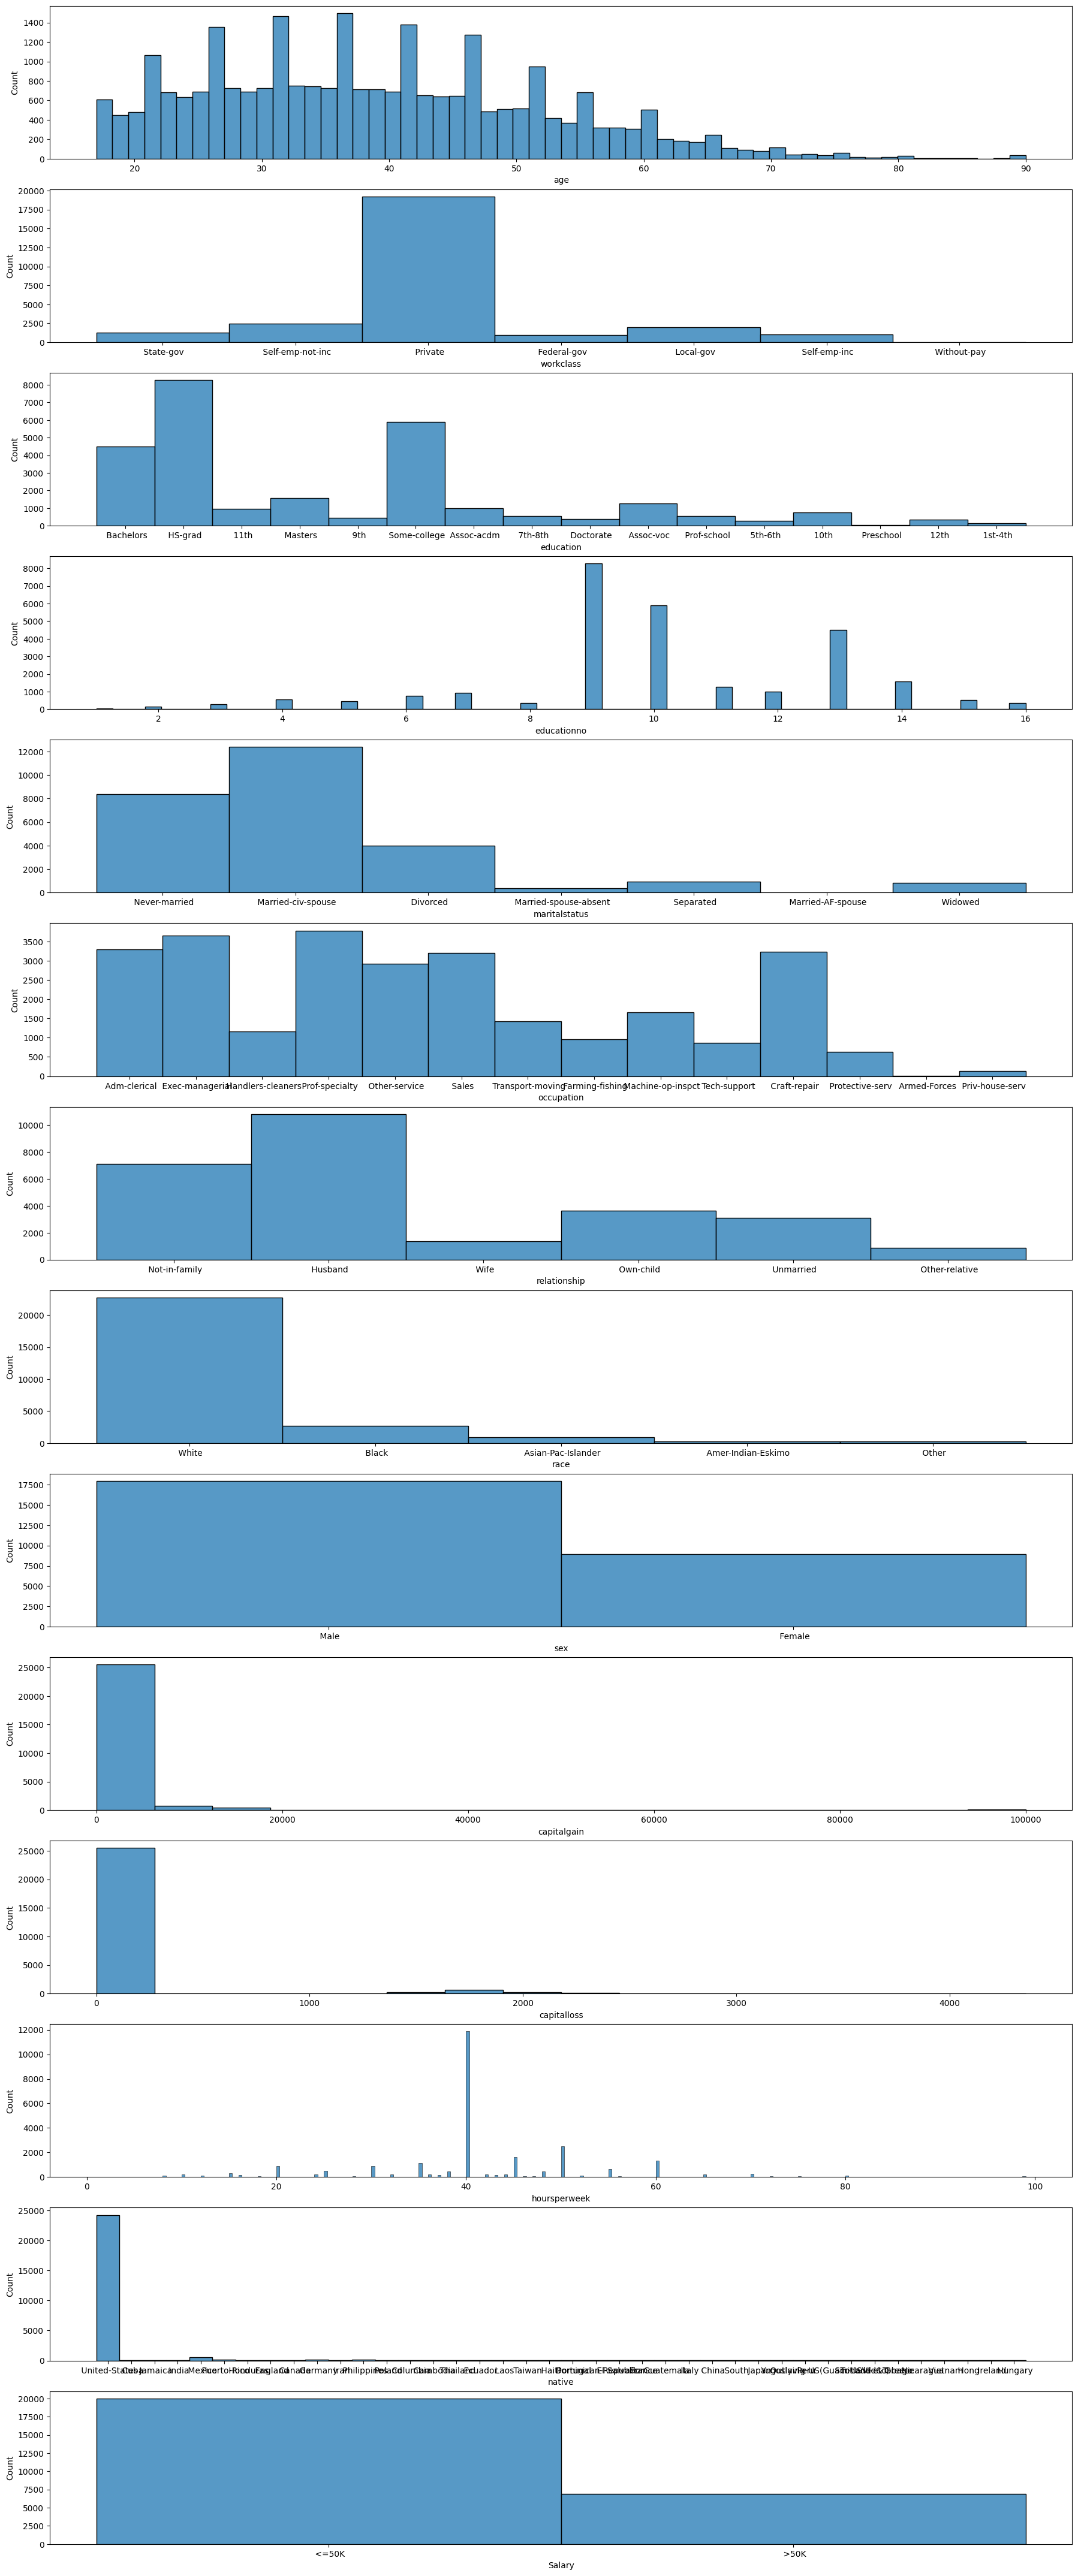

In [ ]:
#plotting histplots to observe datapoints nature
plt.figure(figsize=(22,55))
for i, column in enumerate(salary_train_nodup.columns, 1):
    plt.subplot(14,1,i)
    sns.histplot(salary_train_nodup[column])

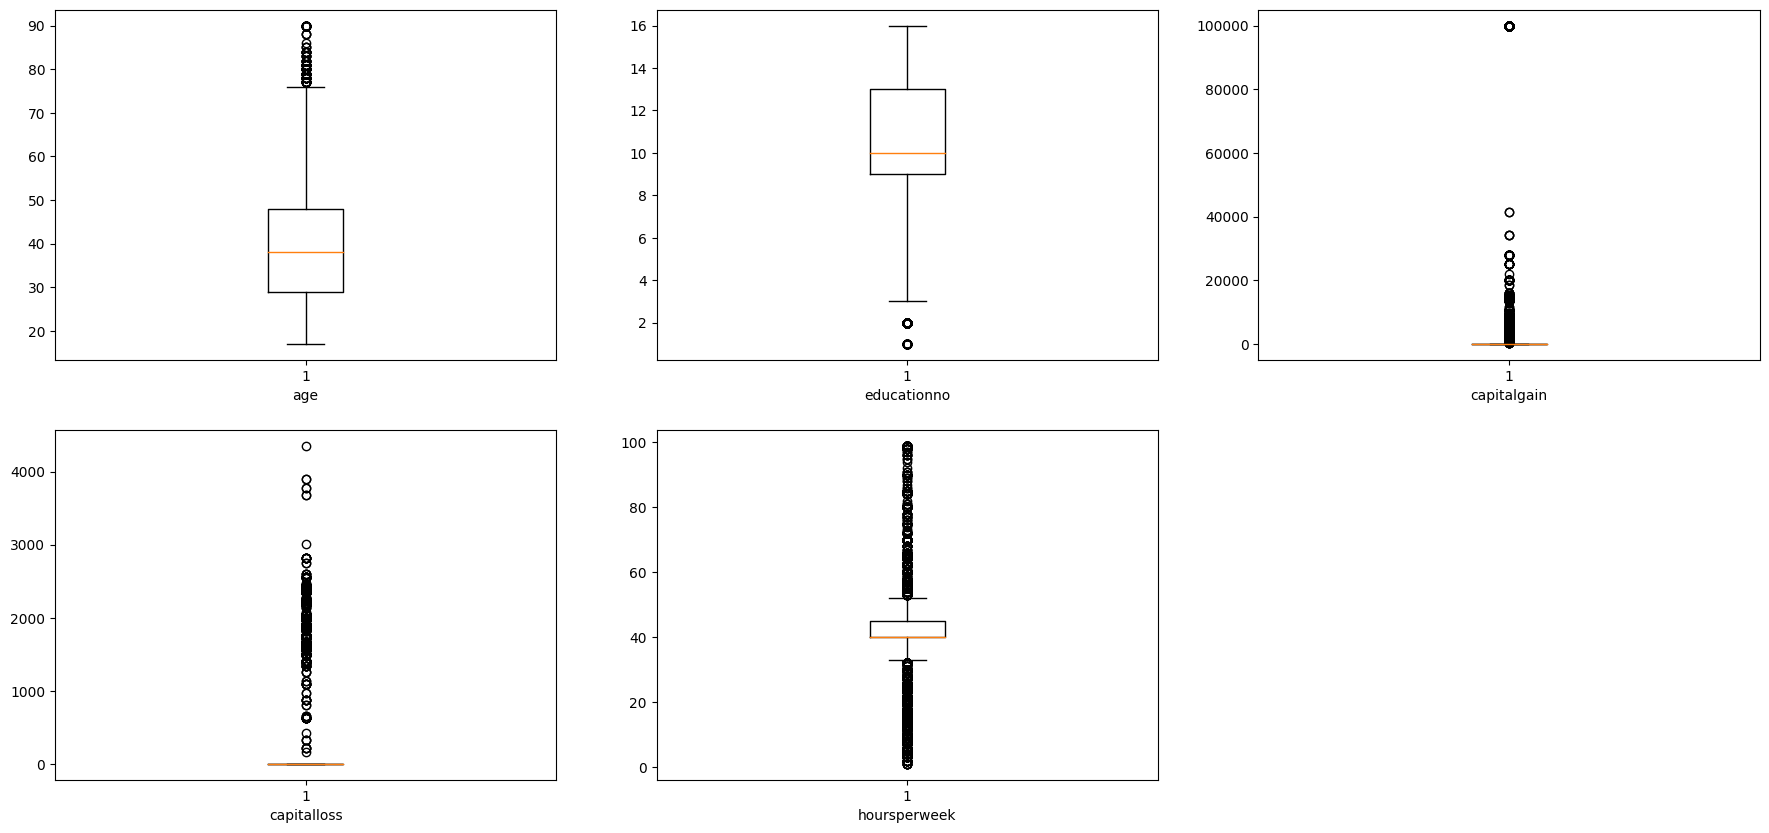

In [ ]:
#plotting boxplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(salary_numerical.columns, 1):
    plt.subplot(2,3,i)
    plt.boxplot(salary_numerical[column])
    plt.xlabel(salary_numerical[column].name)

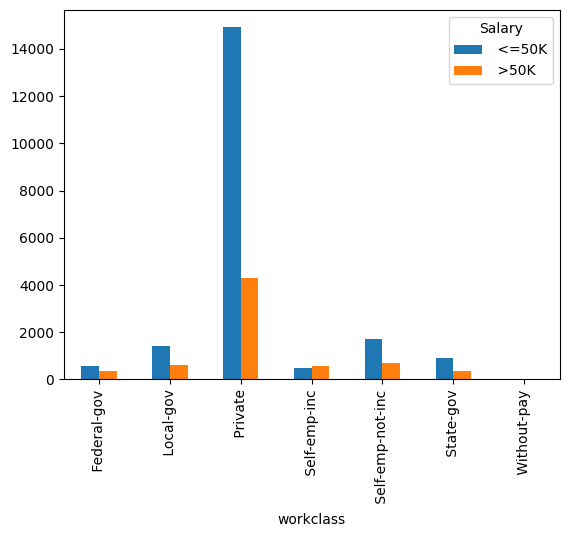

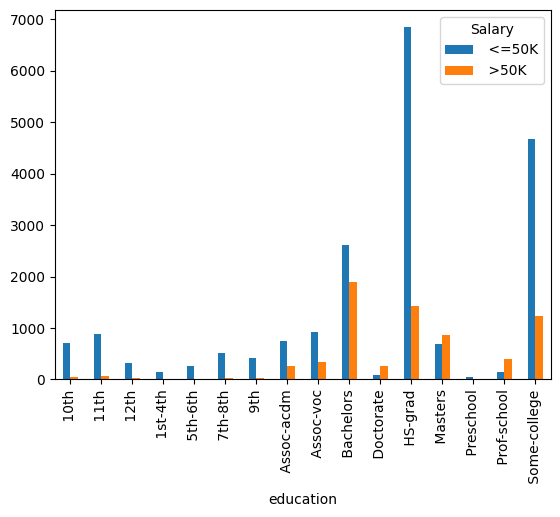

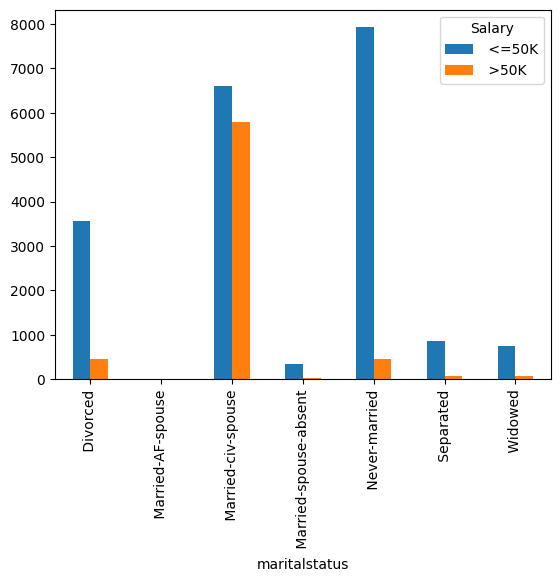

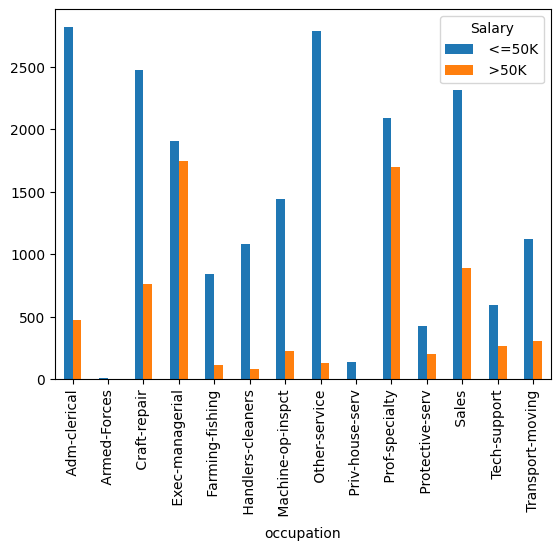

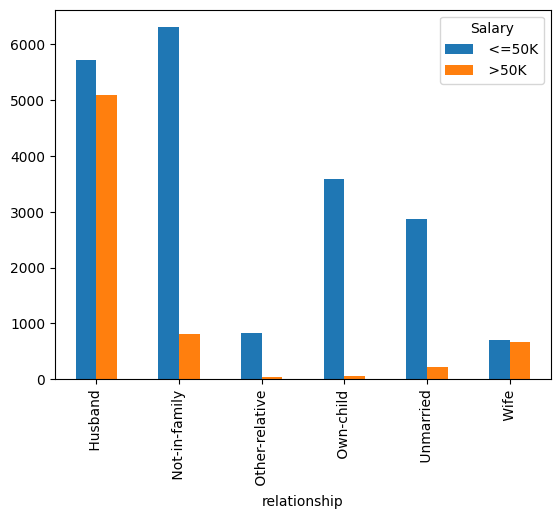

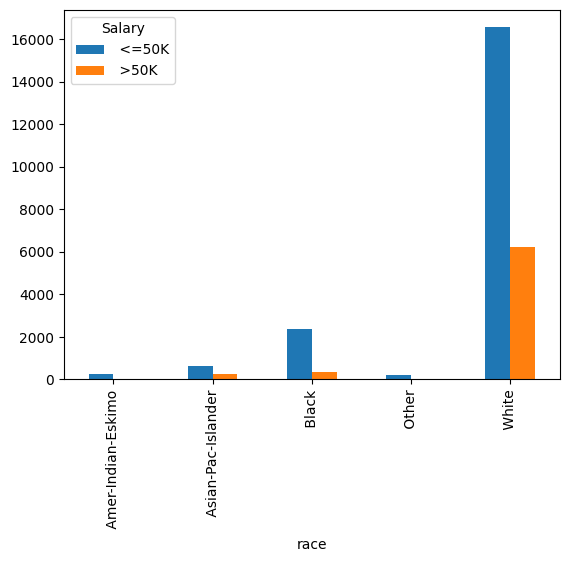

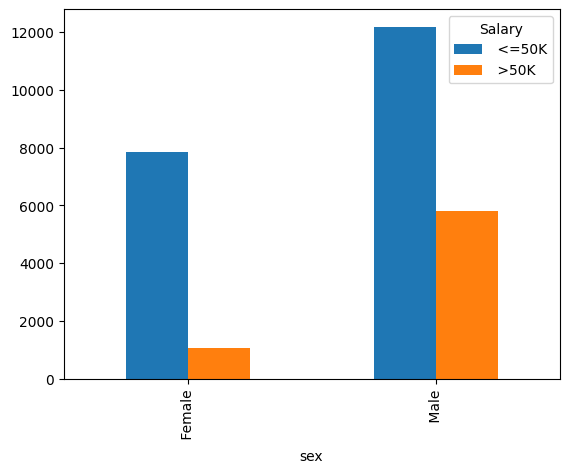

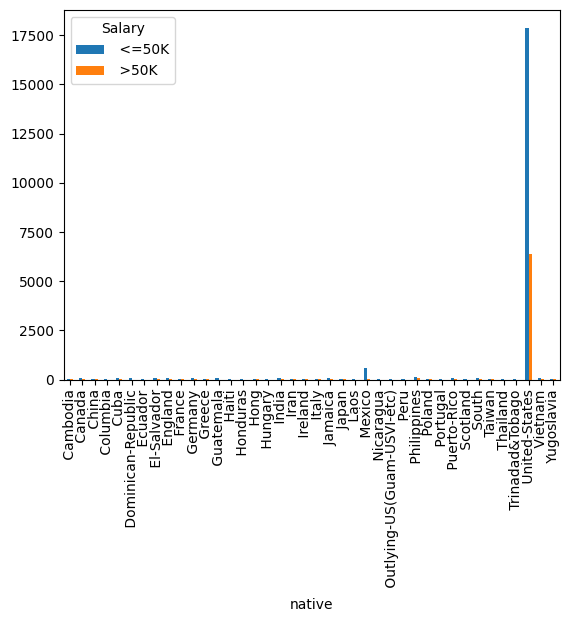

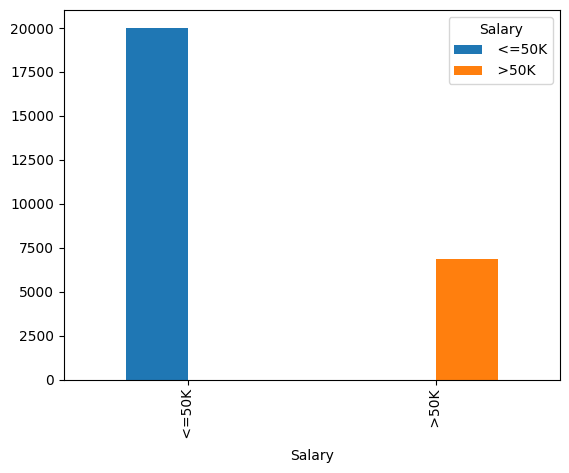

In [ ]:
for i, column in enumerate(salary_categorical.columns, 1):
  pd.crosstab(salary_train_nodup[column],salary_train_nodup.Salary).plot(kind='bar')


Labeling features

In [ ]:
 #labeling features
salary_train_lab=salary_train_nodup.copy()
for i, column in enumerate(salary_train_lab.columns, 1):
  if salary_train_lab[column].dtype!='object':
    continue
  label_encoder=preprocessing.LabelEncoder()
  salary_train_lab[column]=label_encoder.fit_transform(salary_train_lab[column])
salary_train_lab


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


Labelled data Visuals

In [ ]:
#labeling features
salary_test_lab=salary_test.copy()
for i, column in enumerate(salary_test_lab.columns, 1):
  if salary_test_lab[column].dtype!='object':
    continue
  label_encoder=preprocessing.LabelEncoder()
  salary_test_lab[column]=label_encoder.fit_transform(salary_test_lab[column])

salary_test_lab

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


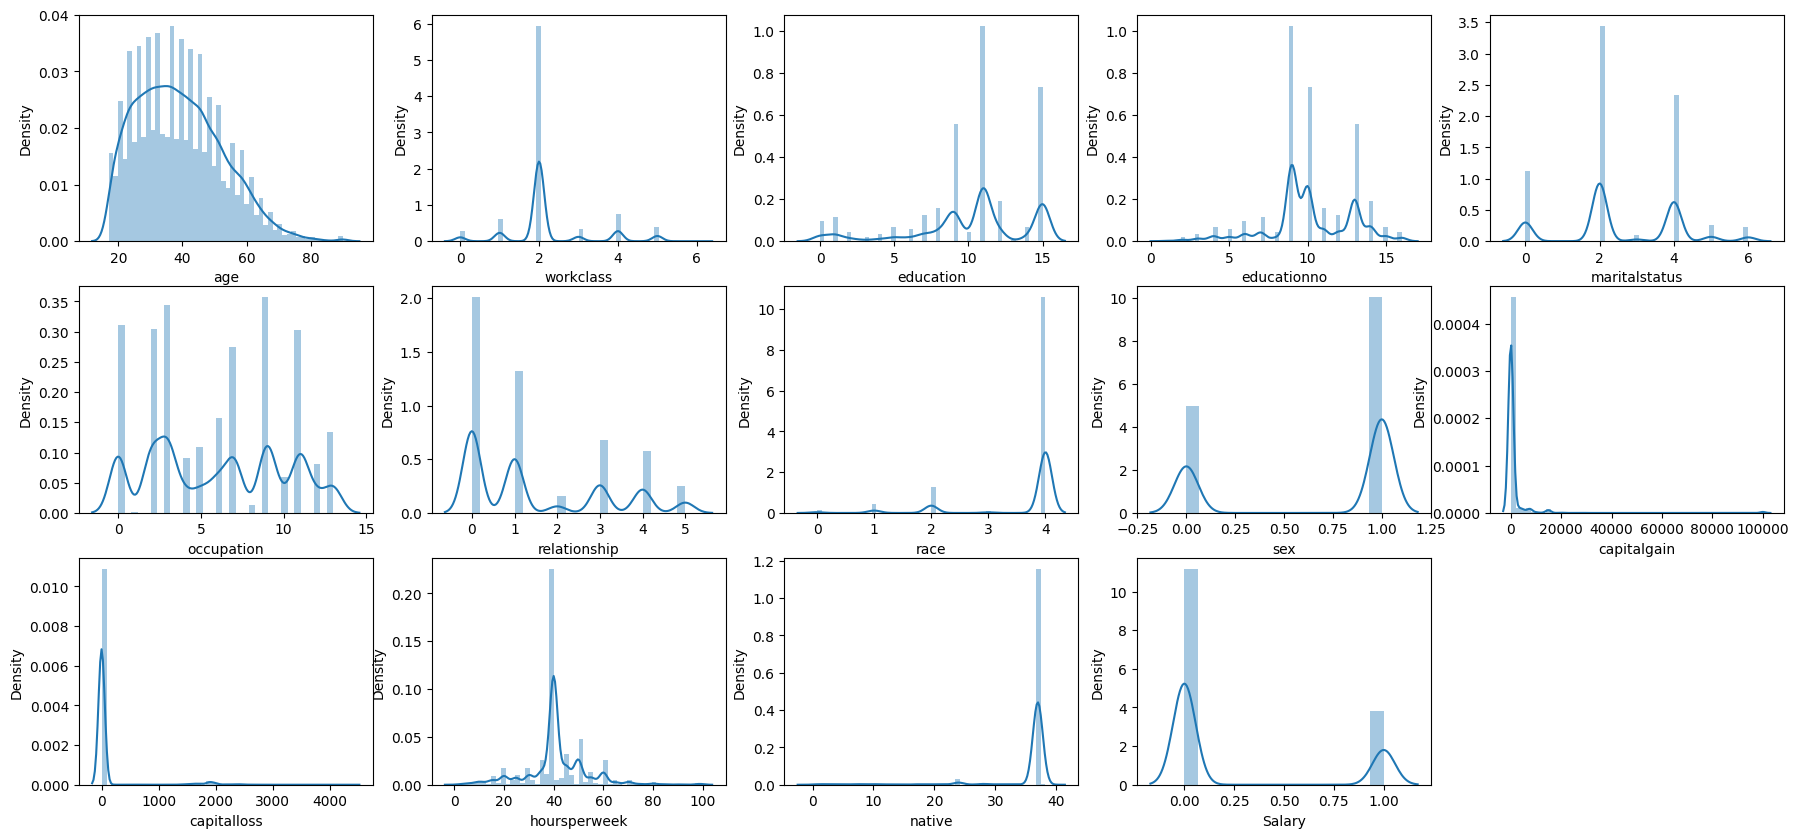

In [ ]:

#plotting distplots to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(salary_train_lab.columns, 1):
    plt.subplot(3,5,i)
    sns.distplot(salary_train_lab[column])


Standardizing & Data splitting

In [ ]:
std=StandardScaler()
ffires_std=ffires_lab.copy()

In [ ]:
x_train = salary_train_lab.drop('Salary',axis=1)
y_train = salary_train_lab['Salary']

x_test = salary_test_lab.drop('Salary',axis=1)
y_test = salary_test_lab['Salary']

In [ ]:

x_train_std=std.fit_transform(x_train)
x_train=pd.DataFrame(x_train_std,columns=x_train.columns)
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-0.003726,2.791383,-0.324519,1.089919,0.939836,-1.503368,-0.277736,0.406417,0.705589,0.122810,-0.23133,-0.094323,0.282414
1,0.830329,1.788156,-0.324519,1.089919,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-2.281121,0.282414
2,-0.079549,-0.218299,0.192999,-0.436737,-1.676988,-0.261669,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
3,1.057799,-0.218299,-2.394592,-1.200065,-0.368576,-0.261669,-0.895505,-1.889403,0.705589,-0.155722,-0.23133,-0.094323,0.282414
4,-0.837781,-0.218299,-0.324519,1.089919,-0.368576,0.731690,2.193341,-1.889403,-1.417255,-0.155722,-0.23133,-0.094323,-4.979105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1.057799,-0.218299,0.451758,1.471583,-0.368576,-0.758349,-0.895505,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
26899,-1.292720,-0.218299,1.228036,-0.055073,0.939836,0.980030,-0.277736,0.406417,0.705589,-0.155722,-0.23133,-0.094323,0.282414
26900,-0.913604,-0.218299,-0.842037,0.708255,-0.368576,1.476709,2.193341,0.406417,-1.417255,-0.155722,-0.23133,-0.256308,0.282414
26901,1.436914,-0.218299,0.192999,-0.436737,2.248248,-1.503368,1.575572,0.406417,-1.417255,-0.155722,-0.23133,-0.094323,0.282414


In [ ]:

x_test_std=std.fit_transform(x_test)
x_test=pd.DataFrame(x_test_std,columns=x_test.columns)
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,-1.029005,-0.222347,-2.423439,-1.216563,0.933187,0.002725,1.006108,-2.034389,0.695832,-0.145438,-0.219169,-0.078889,0.260581
1,-0.057423,-0.222347,0.190172,-0.434898,-0.395463,-0.494789,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
2,-0.804794,-1.257126,-0.855272,0.737599,-0.395463,0.997755,-0.881990,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
3,0.391000,-0.222347,1.235617,-0.044066,-0.395463,0.002725,-0.881990,-2.034389,0.695832,0.852624,-0.219169,-0.078889,0.260581
4,-0.356371,-0.222347,-2.684800,-1.607395,0.933187,0.251483,-0.252624,0.382230,0.695832,-0.145438,-0.219169,-0.907909,0.260581
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.431108,-0.222347,-0.332550,1.128431,0.933187,0.748998,1.006108,0.382230,0.695832,-0.145438,-0.219169,-0.078889,0.260581
15056,0.017315,-0.222347,-0.332550,1.128431,-1.724114,0.748998,-0.252624,0.382230,-1.437128,-0.145438,-0.219169,-0.410497,0.260581
15057,-0.057423,-0.222347,-0.332550,1.128431,-0.395463,0.748998,-0.881990,0.382230,0.695832,-0.145438,-0.219169,0.750131,0.260581
15058,0.391000,-0.222347,-0.332550,1.128431,-1.724114,-1.489819,1.006108,-3.242699,0.695832,0.562734,-0.219169,-0.078889,0.260581


In [ ]:
(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

((26903, 13), (26903,), (15060, 13), (15060,))

Support Vector Machines classifier

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='poly',C=10)
clf.fit(x_train , y_train)
y_train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred) * 100
print("Train data Accuracy =", train_acc)
y_test_pred = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred) * 100
print("Test data Accuracy =", test_acc)

Train data Accuracy = 84.10214474222207
Test data Accuracy = 84.06374501992032



 Test confusion matrix:



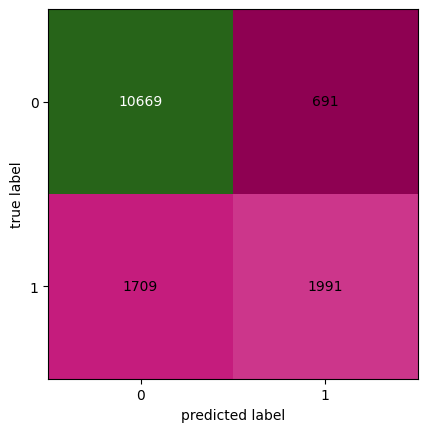

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
print('\n Test confusion matrix:\n')
cmt=confusion_matrix(y_test, y_test_pred)
fig, ax = plot_confusion_matrix(conf_mat=cmt, cmap='PiYG')
plt.show()

In [ ]:
verify=pd.DataFrame({'actual':y_test,'predict':y_test_pred,'equality':y_test==y_test_pred})
verify

,actual,predict,equality
0,0,0,True
1,0,0,True
2,1,0,False
3,1,1,True
4,0,0,True
...,...,...,...
15055,0,0,True
15056,0,0,True
15057,0,1,False
15058,0,1,False


In [ ]:
verify.equality.value_counts()

True     12660
False     2400
Name: equality, dtype: int64

Conclusion:


In [ ]:
print("\n SVM Train  Accuracy =",  np.round(accuracy_score(y_train, y_train_pred),2) * 100,'%')
print("\n SVM Test Accuracy =", np.round(accuracy_score(y_test, y_test_pred),2)* 100,'%')


 SVM Train  Accuracy = 84.0 %

 SVM Test Accuracy = 84.0 %
